In [0]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt

%matplotlib inline

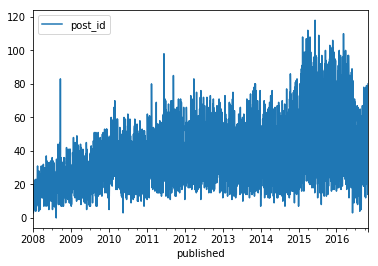

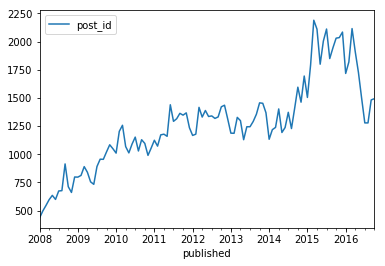

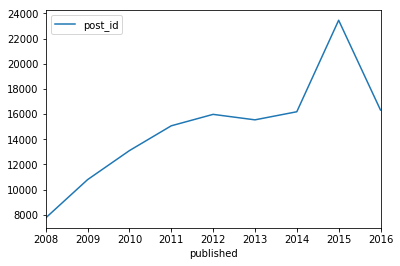

In [51]:
path ='https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/visits.csv'

df = pd.read_csv(path, parse_dates=['published'],index_col='published')


df.resample('1D').count().plot()
df.resample('1M').count().plot()
df.resample('1Y').count().plot()

In [52]:
df_day = df.resample('1D').count().reset_index()
df_day.columns = ['ds', 'y']

df_day

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4
5,2008-01-06,7
6,2008-01-07,17
7,2008-01-08,8
8,2008-01-09,15
9,2008-01-10,20


In [0]:
num_points_to_pred=100
train = df_day[:-num_points_to_pred]
test = df_day[-num_points_to_pred:]
               

In [54]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
future = m.make_future_dataframe(periods=num_points_to_pred, freq='D', include_history=True)
future

,ds
0,2008-01-01
1,2008-01-02
2,2008-01-03
3,2008-01-04
4,2008-01-05
5,2008-01-06
6,2008-01-07
7,2008-01-08
8,2008-01-09
9,2008-01-10


In [0]:
forecast = m.predict(future)


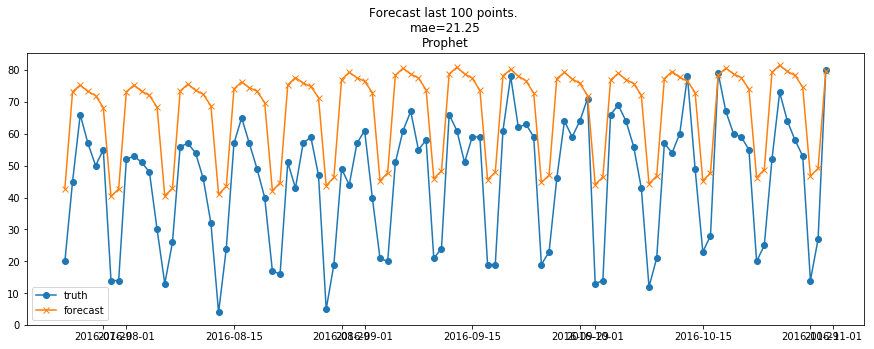

In [60]:
def plot_forecast(test,forecast):
  forecast=forecast[-num_points_to_pred:]
  score= np.round(mae(test.y, forecast.yhat),2)
  plt.figure(figsize=(15,5))
  plt.title("Forecast last {} points. \nmae={}\nProphet".format(num_points_to_pred,score))
  plt.plot(test.ds, test.y , 'o-', label='truth')
  plt.plot(test.ds, forecast.yhat , 'x-', label='forecast')
  plt.legend()
  
plot_forecast(test, forecast)

In [0]:
m.plot_components(forecast)

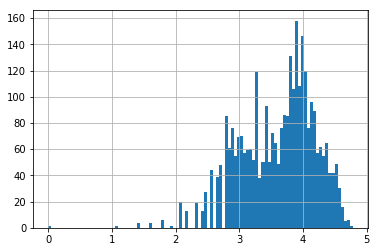

In [62]:
np.log1p(train.y).hist(bins=100)

In [0]:
num_points_pred=100
train=df_day[:-num_points_pred]
test = df_day[-num_points_pred:]

train_log = train.copy()
train_log['y'] = np.log1p(train_log['y'])

In [74]:
m = Prophet(changepoint_prior_scale=0.01)
m.fit(train_log)
future = m.make_future_dataframe(periods=num_points_pred, \
                                freq ='D', include_history=False)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast = m.predict(future)
forecast['yhat'] = np.expm1(forecast.yhat)

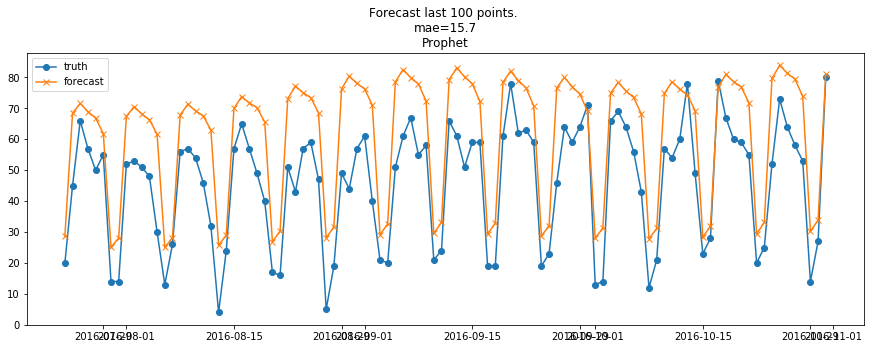

In [75]:
plot_forecast(test,forecast)

In [0]:
from fbprophet.diagnostics import cross_validation
len(train), len(test)

df_cv = cross_validation(m,initial='2500days',period='10days',horizon='30days')



In [0]:
df_cv.groupby('cutoff').count()

In [0]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [0]:
plot_cross_validation_metric(df_cv, 'mae')
plot_cross_validation_metric(df_cv, 'mape')